In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
# reading the csv file Flux24
df = pd.read_csv('data/Zoning Province/Flux_24h.csv',sep = ';')
df

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume
0,2020-01-31,Bas-Uele,Tshopo,1h,Destination_Zone_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,124
1,2020-01-31,Bas-Uele,Tshopo,3h,Destination_Zone_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,124
2,2020-01-31,Equateur,Kinshasa,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,577
3,2020-01-31,Equateur,Kinshasa,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,290
4,2020-01-31,Equateur,Nord-Ubangi,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,288
...,...,...,...,...,...,...,...,...,...
142771,2020-06-29,Tshopo,Maniema,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,101
142772,2020-06-29,Tshopo,Mongala,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,118
142773,2020-06-29,Tshopo,Mongala,1h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1097
142774,2020-06-29,Tshopo,Sud-Kivu,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,101


In [3]:
# read csv file Entrant_Sortant

# pd.read_csv('../../data/export_csv/Flux_24h')
df_ent_sort_s = []

for adate in list(df.groupby('Date').groups.keys()):
    df_ent_sort_s.append(pd.read_csv('../../data/Zoning Province/Flux_Entrant_Sortant_%s.csv'%(adate),sep = ';'))
df_ent_sort = pd.concat(df_ent_sort_s)
df_ent_sort

,Date,Hour,Day_type,Zone,TypeFlux,Home_Zone,Activity_Zone,Volume
0,2020-01-31,20:30:00,JO,Haut-Katanga,Entree,Haut-Katanga,Haut-Katanga,3949
1,2020-01-31,20:30:00,JO,Haut-Katanga,Entree,Haut-Katanga,Lualaba,607
2,2020-01-31,20:30:00,JO,Haut-Katanga,Entree,Hors_Zone,Hors_Zone,303
3,2020-01-31,20:30:00,JO,Haut-Katanga,Entree,Hors_Zone,Lualaba,303
4,2020-01-31,20:30:00,JO,Haut-Katanga,Entree,Lomami,Lomami,385
...,...,...,...,...,...,...,...,...
3497,2020-06-29,20:00:00,JO,Sud-Kivu,Sortie,Nord-Kivu,Hors_Zone,711
3498,2020-06-29,20:00:00,JO,Sud-Kivu,Sortie,Nord-Kivu,Nord-Kivu,13708
3499,2020-06-29,20:00:00,JO,Sud-Kivu,Sortie,Nord-Kivu,Sud-Kivu,3188
3500,2020-06-29,20:00:00,JO,Sud-Kivu,Sortie,Sud-Kivu,Nord-Kivu,685


In [4]:
# read csv file Flux_30min

df_Flux_30min_s = []
for adate in list(df.groupby('Date').groups.keys()):
    df_Flux_30min_s.append(pd.read_csv('../../data/Zoning Province/Flux_30min_%s.csv'%(adate),sep = ';'))
df_Flux_30min = pd.concat(df_Flux_30min_s)
df_Flux_30min

,Date,Hour,Day_type,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume
0,2020-01-31,20:30:00,JO,Haut-Katanga,Kinshasa,1h,Destination_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,37
1,2020-01-31,20:30:00,JO,Haut-Katanga,Kinshasa,1h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,74
2,2020-01-31,20:30:00,JO,Haut-Katanga,Kinshasa,3h,Destination_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,37
3,2020-01-31,20:30:00,JO,Haut-Katanga,Kinshasa,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,74
4,2020-01-31,20:30:00,JO,Haut-Katanga,Lualaba,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,111
...,...,...,...,...,...,...,...,...,...,...,...
5441,2020-06-29,20:00:00,JO,Sud-Kivu,Nord-Kivu,3h,Destination_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,177
5442,2020-06-29,20:00:00,JO,Sud-Kivu,Nord-Kivu,3h,Origin_Zone_Resident,Outside_Worker,ZoneGlobale,All_modes,24
5443,2020-06-29,20:00:00,JO,Sud-Kivu,Nord-Kivu,3h,Origin_Zone_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,34
5444,2020-06-29,20:00:00,JO,Sud-Kivu,Nord-Kivu,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,167


## Inbound Viz

In [5]:
df_ent_sort[df_ent_sort.duplicated()]

,Date,Hour,Day_type,Zone,TypeFlux,Home_Zone,Activity_Zone,Volume


In [6]:
df_Flux_30min[df_Flux_30min.duplicated()]

,Date,Hour,Day_type,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume


In [7]:
df = df.drop_duplicates()
df

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume
0,2020-01-31,Bas-Uele,Tshopo,1h,Destination_Zone_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,124
1,2020-01-31,Bas-Uele,Tshopo,3h,Destination_Zone_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,124
2,2020-01-31,Equateur,Kinshasa,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,577
3,2020-01-31,Equateur,Kinshasa,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,290
4,2020-01-31,Equateur,Nord-Ubangi,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,288
...,...,...,...,...,...,...,...,...,...
142771,2020-06-29,Tshopo,Maniema,3h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,101
142772,2020-06-29,Tshopo,Mongala,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,118
142773,2020-06-29,Tshopo,Mongala,1h,Origin_Zone_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1097
142774,2020-06-29,Tshopo,Sud-Kivu,1h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,101


In [8]:
df[df.duplicated()]

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume


<AxesSubplot:>

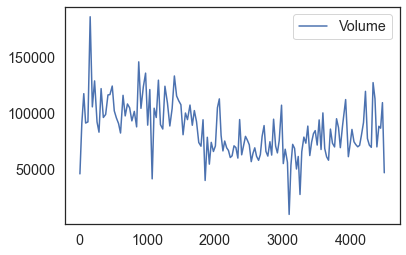

In [113]:
df_ent_sort_agg = df_ent_sort.groupby(by=['Date','Zone','TypeFlux'], as_index=False).sum()

df_ent_sort_agg = df_ent_sort_agg[(df_ent_sort_agg.TypeFlux == 'Entree') ]

df_ent_sort_agg[(df_ent_sort_agg.Zone == 'Kinshasa')].plot()

<AxesSubplot:>

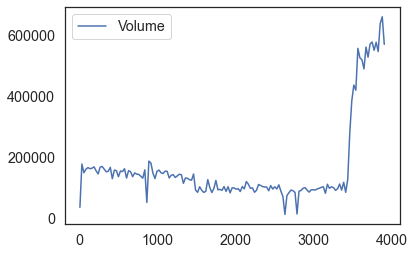

In [114]:
df_Flux_30min_agg = df_Flux_30min.groupby(by=['Date','Destination'], as_index=False).sum()
df_Flux_30min_agg[df_Flux_30min_agg.Destination == 'Kinshasa'].plot()

<AxesSubplot:>

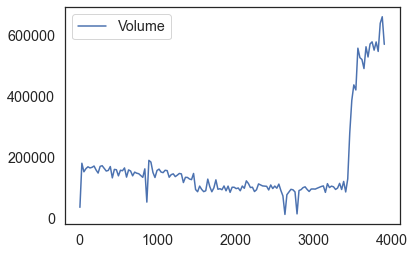

In [115]:
df_flux24_agg = df.groupby(by=['Date','Destination'], as_index=False).sum()
df_flux24_agg[df_flux24_agg.Destination == 'Kinshasa'].plot()

In [116]:
#Date Conversion
df_Flux_30min_agg['Date'] = pd.to_datetime(df_Flux_30min_agg['Date'])
df_ent_sort_agg['Date'] = pd.to_datetime(df_ent_sort_agg['Date'])
df_flux24_agg['Date'] = pd.to_datetime(df_flux24_agg['Date'])


#merging DFs
df_merged = pd.merge(df_Flux_30min_agg, df_ent_sort_agg, left_on=['Date','Destination'],right_on=['Date','Zone'])

In [117]:
df_merged = pd.merge(df_merged, df_flux24_agg, left_on=['Date','Destination'],right_on=['Date','Destination'])
df_merged

,Date,Destination,Volume_x,Zone,TypeFlux,Volume_y,Volume
0,2020-01-31,Haut-Katanga,21682,Haut-Katanga,Entree,32039,21742
1,2020-01-31,Haut-Lomami,6162,Haut-Lomami,Entree,60774,6180
2,2020-01-31,Kasai,11070,Kasai,Entree,64832,11101
3,2020-01-31,Kasai-Central,27710,Kasai-Central,Entree,73068,27728
4,2020-01-31,Kasai-Oriental,57937,Kasai-Oriental,Entree,190293,57991
...,...,...,...,...,...,...,...
2243,2020-06-29,Kwilu,126664,Kwilu,Entree,50209,126949
2244,2020-06-29,Lomami,275953,Lomami,Entree,1040997,276318
2245,2020-06-29,Lualaba,156674,Lualaba,Entree,400136,156937
2246,2020-06-29,Nord-Kivu,330812,Nord-Kivu,Entree,804257,331123


In [118]:
prov = 'Haut-Katanga'
df_merged_kin = df_merged[df_merged.Destination == prov]


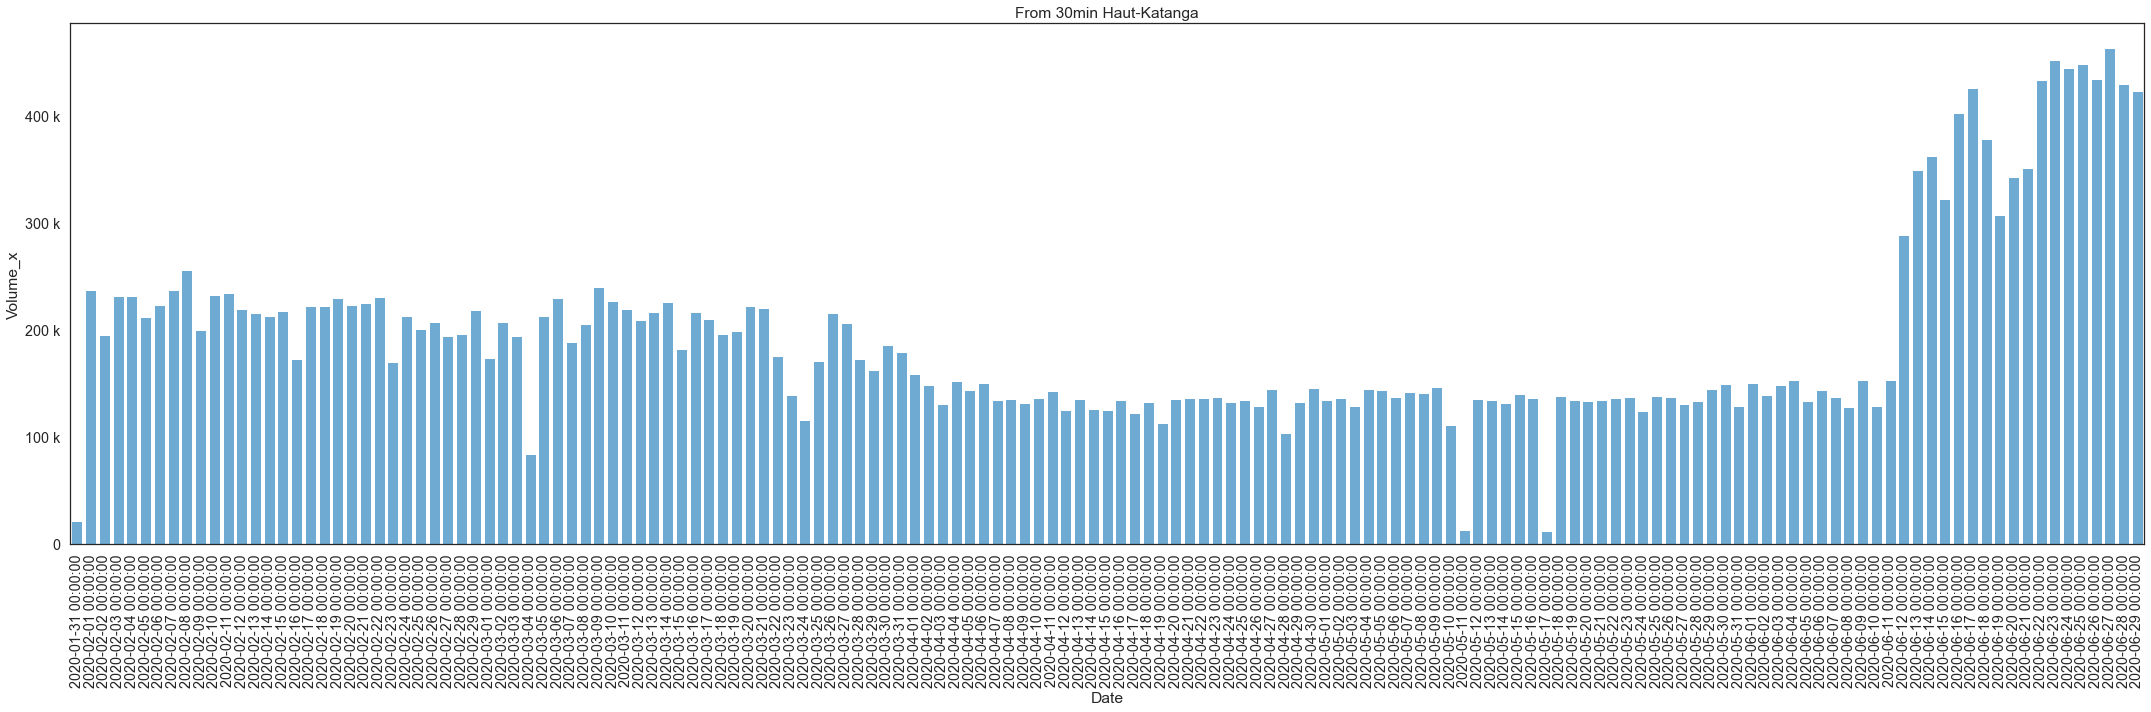

In [119]:
fig = plt.figure(figsize=(30,10))


ax = sns.barplot(x='Date',y='Volume_x',data=df_merged_kin,palette=['#5DADE2'])
ax.set(title = 'From 30min '+prov)
ax.set_xticklabels(labels = df_merged_kin['Date'], rotation=90)
# ax.
# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

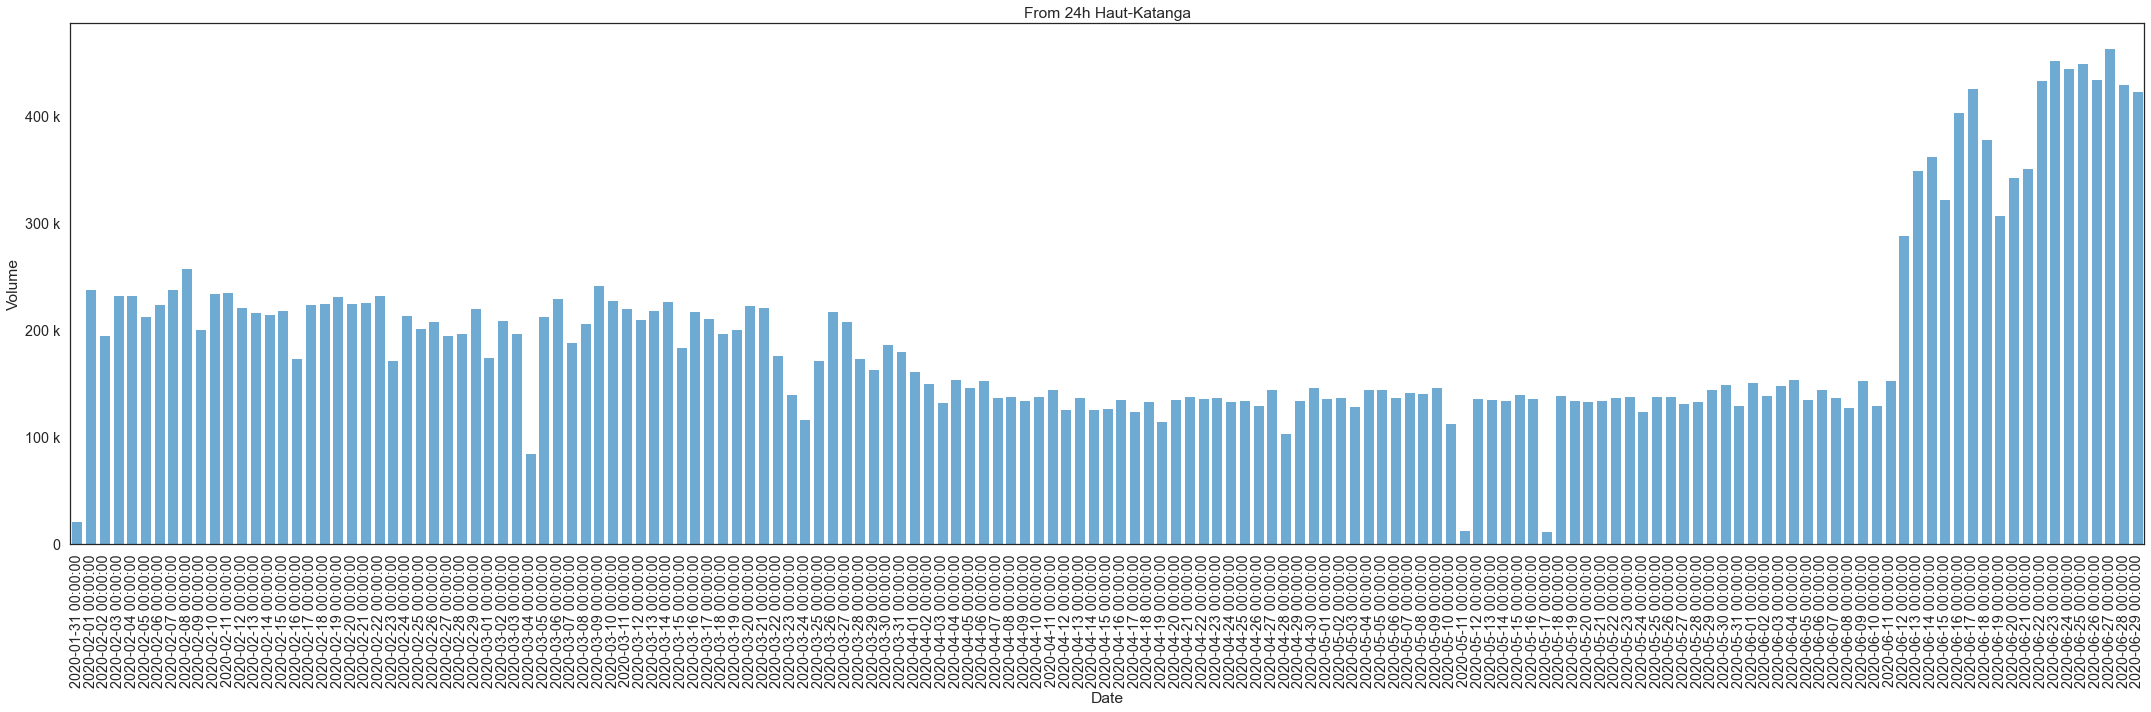

In [120]:
fig = plt.figure(figsize=(30,10))


ax = sns.barplot(x='Date',y='Volume',data=df_merged_kin,palette=['#5DADE2'])
ax.set(title = 'From 24h '+prov)
ax.set_xticklabels(labels = df_merged_kin['Date'], rotation=90)
# ax.
# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

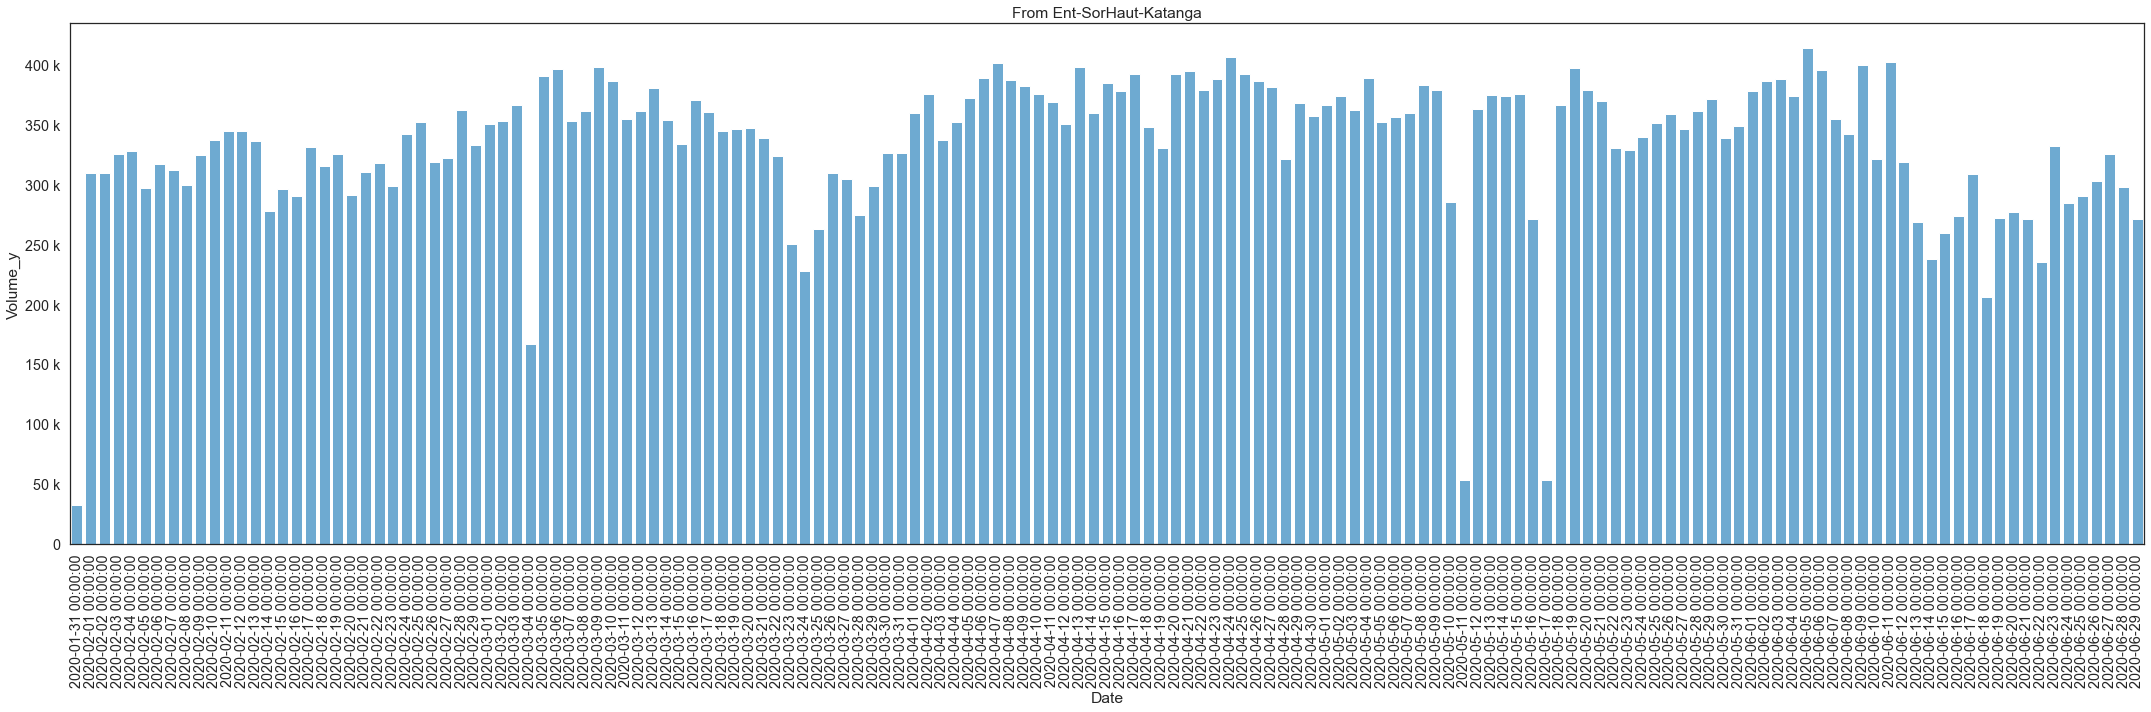

In [121]:
fig = plt.figure(figsize=(30,10))


ax = sns.barplot(x='Date',y='Volume_y',data=df_merged_kin,palette=['#5DADE2'])
ax.set(title = 'From Ent-Sor'+prov)
ax.set_xticklabels(labels = df_merged_kin['Date'], rotation=90)
# ax.
# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()